In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import wrangle

In [2]:
df = pd.read_fwf('auto-mpg.data', header=None) #these are notes from class
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [3]:
df.columns = ['mpg', 'cylinders', 'displ', 'horsepower', 'weight', 'acceleration', #these are notes from class
            'model_year', 'origin', 'make_model']
df.head()

,mpg,cylinders,displ,horsepower,weight,acceleration,model_year,origin,make_model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [4]:
df.isna().sum()#these are notes from class

mpg             0
cylinders       0
displ           0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
make_model      0
dtype: int64

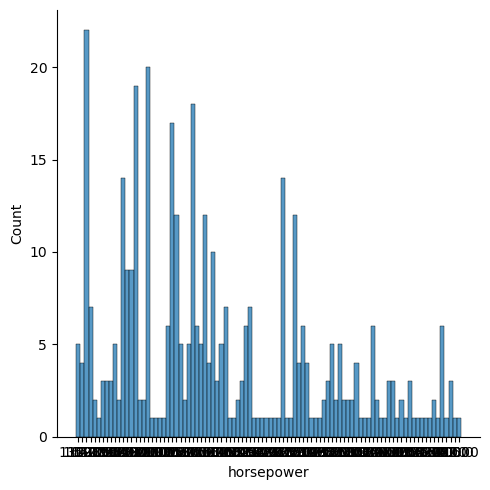

In [5]:
sns.displot(df['horsepower']) #these are notes from class

In [6]:
df = df[df['horsepower'] !='?'] #these are notes from class

In [7]:
df['horsepower'] = df['horsepower'].astype('float') #these are notes from class

In [8]:
train, test = train_test_split(df, train_size=0.7, random_state=42)
train.shape, test.shape #these are notes from class

((274, 9), (118, 9))

In [9]:
from sklearn.preprocessing import MinMaxScaler #these are notes from class

In [10]:
 mm_scaler = MinMaxScaler()#these are notes from class

In [11]:
mm_scaler.fit(train[['horsepower']])#these are notes from class

MinMaxScaler()

In [12]:
mm_horsepower = mm_scaler.transform(train[['horsepower']])#these are notes from class

In [13]:
#these are notes from classtrain['horsepower'].head()

In [14]:
mm_horsepower[:5] #give first 5 elements but not the 5th index

array([[0.25274725],
       [0.2032967 ],
       [0.24175824],
       [0.23076923],
       [0.28571429]])

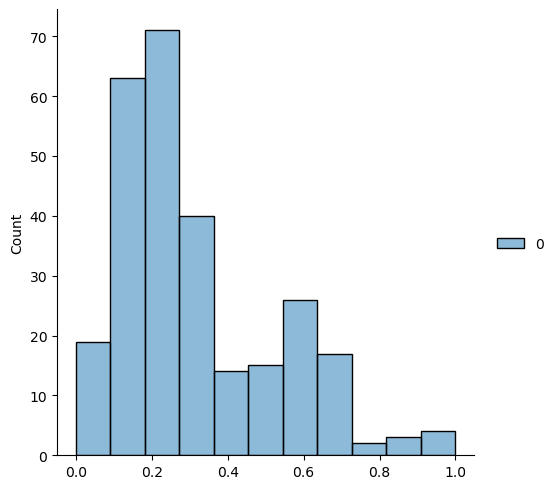

In [15]:
sns.displot(mm_horsepower)
plt.show()#these are notes from class


# Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler#these are notes from class

In [17]:
ss_scaler = StandardScaler()#these are notes from class

In [18]:
ss_scaler.fit(train[['horsepower']])#these are notes from class

StandardScaler()

In [19]:
ss_horsepower = ss_scaler.transform(train[['horsepower']])#these are notes from class

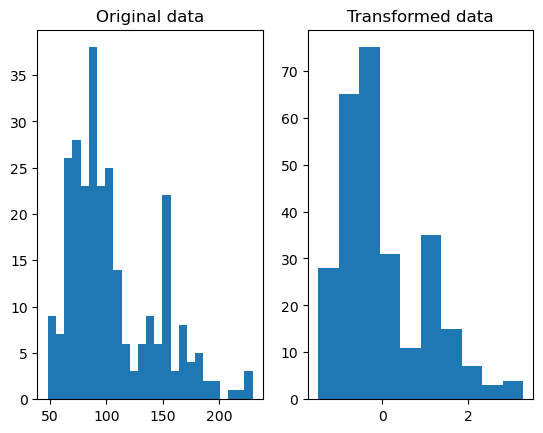

In [20]:
plt.subplot(121)
plt.hist(train['horsepower'], bins=25)
plt.title('Original data')

plt.subplot(122)
plt.hist(ss_horsepower)
plt.title('Transformed data')
plt.show()#these are notes from class

In [21]:
def compare_plots(transformed_data, original_data=train['horsepower']):
    plt.subplot(121)
    plt.hist(train['horsepower'], bins=25)
    plt.title('Original data')

    plt.subplot(122)
    plt.hist(ss_horsepower)
    plt.title('Transformed data')
    plt.show()#these are notes from class

# Robust Scaling

In [22]:
from sklearn.preprocessing import RobustScaler#these are notes from class

In [23]:
rs_scaler = RobustScaler()#these are notes from class

In [24]:
rs_scaler.fit(df[['horsepower']])#these are notes from class

RobustScaler()

In [25]:
rs_horsepower = rs_scaler.transform(train[['horsepower']])#these are notes from class

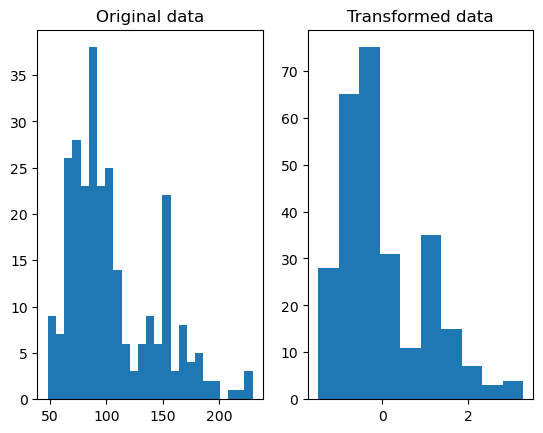

In [26]:
compare_plots(rs_horsepower)#these are notes from class

In [27]:
rs_scaler.fit(train[['horsepower', 'weight']])#these are notes from class

RobustScaler()

In [28]:
double_trouble = rs_scaler.transform(train[['horsepower', 'weight']])#these are notes from class
double_trouble[:10]

array([[ 0.00930233, -0.31836291],
       [-0.15813953, -0.16769286],
       [-0.02790698, -0.27852227],
       [-0.06511628, -0.12350598],
       [ 0.12093023,  0.37486418],
       [-0.4744186 , -0.61463238],
       [ 0.02790698, -0.09018472],
       [-0.10232558, -0.05686346],
       [-0.77209302, -0.56754799],
       [-0.28837209, -0.45526983]])

In [29]:
rs_horsepower[:10]#these are notes from class

array([[ 0.00980392],
       [-0.16666667],
       [-0.02941176],
       [-0.06862745],
       [ 0.12745098],
       [-0.5       ],
       [ 0.02941176],
       [-0.10784314],
       [-0.81372549],
       [-0.30392157]])

# Start of Exercises

### Showing the scaled and unscaled 

In [30]:
df = wrangle.get_zillow_data()

In [31]:
train, validate, test = wrangle.wrangle_zillow()

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192919 entries, 553191 to 1333156
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1192919 non-null  float64
 1   bathrooms   1192919 non-null  float64
 2   area        1192919 non-null  float64
 3   tax_value   1192919 non-null  float64
 4   year_built  1192919 non-null  float64
 5   taxamount   1192919 non-null  float64
 6   fips        1192919 non-null  float64
dtypes: float64(7)
memory usage: 72.8 MB


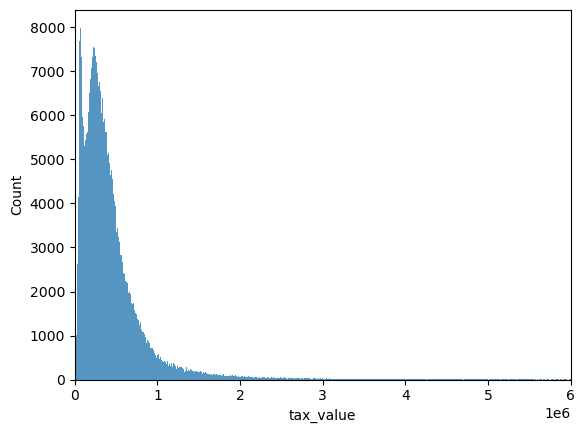

In [53]:
sns.histplot(test['tax_value'])
plt.xlim(0,6000000)
plt.show()

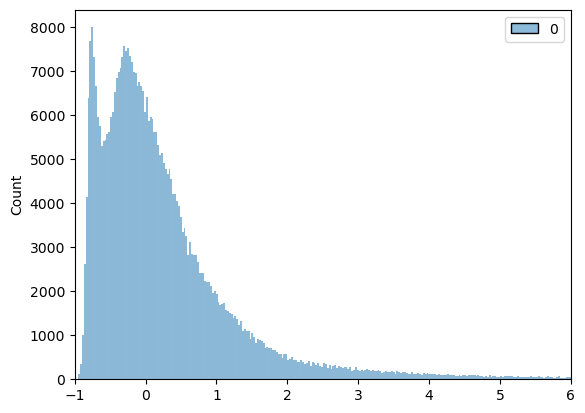

In [54]:

rs_scaler = RobustScaler()#these are notes from class
rs_scaler.fit(test[['tax_value']])#these are notes from class
rs_tax_value = rs_scaler.transform(test[['tax_value']])#these are notes from class
sns.histplot(rs_tax_value)
plt.xlim(-1,6)
plt.show()

In [36]:
taxes = test['tax_value']

In [37]:
taxes_adjusted = taxes[taxes.between(taxes.quantile(.05), taxes.quantile(.95))] 

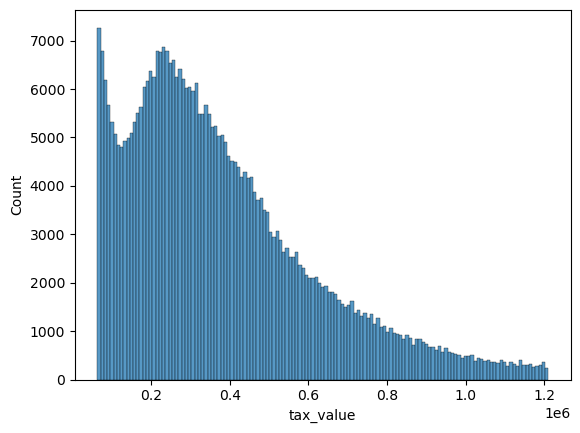

In [38]:
sns.histplot(taxes_adjusted)
plt.show()